In [1]:
from keras.datasets import reuters
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
train_data.shape

(8982,)

In [3]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

In [4]:
import numpy as np 
def vectorize_sequences(sequences,dimension=10000):
    results=np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence]=1
    return results

In [5]:
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [6]:
from keras.utils.np_utils import to_categorical
one_hot_train_label=to_categorical(train_labels)
one_hot_test_label=to_categorical(test_labels)

In [7]:
from keras import models
from keras import layers
model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

In [8]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [9]:
x_val=x_train[:1000]
partial_x_train=x_train[1000:]
y_val=one_hot_train_label[:1000]
partial_y_train=one_hot_train_label[1000:]

In [10]:
history=model.fit(
    partial_x_train,
    partial_y_train,
    batch_size=512,
    epochs=20,
    validation_data=(x_val,y_val)
)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 4s 545us/step - loss: 2.8165 - accuracy: 0.4357 - val_loss: 1.8401 - val_accuracy: 0.6350
Epoch 2/20
7982/7982 [==============================] - 1s 93us/step - loss: 1.5008 - accuracy: 0.7115 - val_loss: 1.3351 - val_accuracy: 0.7350
Epoch 3/20
7982/7982 [==============================] - 1s 76us/step - loss: 1.0987 - accuracy: 0.7762 - val_loss: 1.1637 - val_accuracy: 0.7370
Epoch 4/20
7982/7982 [==============================] - 1s 67us/step - loss: 0.8633 - accuracy: 0.8191 - val_loss: 1.0474 - val_accuracy: 0.7660
Epoch 5/20
7982/7982 [==============================] - 0s 60us/step - loss: 0.6940 - accuracy: 0.8545 - val_loss: 0.9633 - val_accuracy: 0.7940
Epoch 6/20
7982/7982 [==============================] - 1s 90us/step - loss: 0.5542 - accuracy: 0.8872 - val_loss: 0.9474 - val_accuracy: 0.7940
Epoch 7/20
7982/7982 [==============================] - 1s 83us/step - loss: 0.44

No handles with labels found to put in legend.


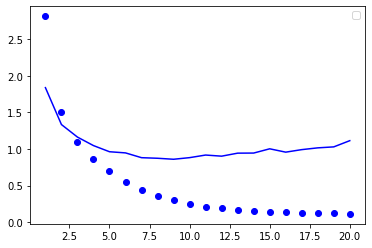

In [12]:
import matplotlib.pyplot as plt 
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'bo')
plt.plot(epochs,val_loss,'b')
plt.legend()
plt.show()